# My first Titanic notebook

## Import libraries

In [54]:
import numpy as np
import pandas as pd

from math import log10

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load data

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = [train, test] #to make some of the preprocessing easier

print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Discovering features and first glance

In [56]:
print("Features: ", train.columns.values)
train.head()

Features:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Splitting features 
Categorical: Pclass (passenger class), Name, Sex, Ticket, Cabin, Embarked
<br> Numerical: Age, SibSp (no. of siblings/spouses), Parch (no. of parents/children), Fare (ticket price)

## Missing values

In [57]:
print("TRAIN INFO")
print('-' * 40)
train.info()

print("\nTEST INFO")
print('-' * 40)
test.info()

TRAIN INFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

TEST INFO
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  D

## Missing values:
* train set - Cabin > Age > Embarked
* test set - Cabin > Age > Fare

## Descriptive statistics

In [58]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
train.quantile(0.9)

PassengerId    802.0000
Survived         1.0000
Pclass           3.0000
Age             50.0000
SibSp            1.0000
Parch            2.0000
Fare            77.9583
Name: 0.9, dtype: float64

In [60]:
train.quantile(0.99)

PassengerId    882.10000
Survived         1.00000
Pclass           3.00000
Age             65.87000
SibSp            5.00000
Parch            4.00000
Fare           249.00622
Name: 0.99, dtype: float64

## Observations:
* most of these passangers did not survive (only survived 38%),
* most of the passangers travelled as 3rd class passangers,
* most of the passangers did not travel with family,
* only 1% of the passangers paid high fare,
* 90% of the passangers were relatively young (< 50).


## Categorical features

In [61]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Toomey, Miss. Ellen",male,1601,B96 B98,S
freq,1,577,7,4,644


Explanation: <br>
top - most commonly occuring value <br>
freq - frequency (or count of occurance) of most commonly occuring value

## Dropping features

Let's take a look at the Ticket feature.

In [62]:
train["Ticket"][0:50]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
30            PC 17601
31            PC 17569
32              335677
33          C.A. 24579
34            PC 17604
35              113789
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
41               11668
42              349253
43       SC

Let's drop Ticket feature for now (we may derive some interesting features later). It seems to random.

In [63]:
train = train.drop(columns = "Ticket")

ID column isn't useful at all.

In [64]:
train = train.drop(columns = "PassengerId")

There are lot of missing values in Cabin column, let's take a look at it.

In [65]:
train["Cabin"][0:50]

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
30            NaN
31            B78
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
41            NaN
42            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
Name: Cabin, dtype: object

It looks like we could leave the first letter only and create a new label for NaN or drop it.
Let's drop it for now.

In [66]:
train = train.drop(columns = "Cabin")

Let's see, if we can drop Name feature.

In [81]:
third_class = train["Pclass"] == 3
train[third_class]["Name"][0:20]

0                               Braund, Mr. Owen Harris
2                                Heikkinen, Miss. Laina
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                      Sandstrom, Miss. Marguerite Rut
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
16                                 Rice, Master. Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
22                          McGowan, Miss. Anna "Annie"
24                        Palsson, Miss. Torborg Danira
25    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
26                              Emir, Mr. Farred Chehab
28                        O'Dwyer, Miss. Ellen "

In [82]:
first_class = train["Pclass"] == 1
train[first_class]["Name"][0:20]

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
23                         Sloper, Mr. William Thompson
27                       Fortune, Mr. Charles Alexander
30                             Uruchurtu, Don. Manuel E
31       Spencer, Mrs. William Augustus (Marie Eugenie)
34                              Meyer, Mr. Edgar Joseph
35                       Holverson, Mr. Alexander Oskar
52             Harper, Mrs. Henry Sleeper (Myna Haxtun)
54                       Ostby, Mr. Engelhart Cornelius
55                                    Woolner, Mr. Hugh
61                                  Icard, Miss. Amelie
62                          Harris, Mr. Henry Birkhardt
64                                Stewart, Mr. Albert A
83                              Carrau, Mr. Francisco M
88                           Fortune, Miss. Mabe

### Analyzing correlations


In [67]:
train[["Pclass", "Survived"]].groupby("Pclass", as_index = True).mean().sort_values(by = "Survived", ascending = False) 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [68]:
train[["Sex", "Survived"]].groupby("Sex", as_index = True).mean().sort_values(by = "Survived", ascending = False) 

,Survived
Sex,
female,0.742038
male,0.188908


In [69]:
train[["Embarked", "Survived"]].groupby("Embarked", as_index = True).mean().sort_values(by = "Survived", ascending = False) 

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [70]:
train[["Parch", "Survived"]].groupby("Parch", as_index = True).mean().sort_values(by = "Survived", ascending = False) 

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [71]:
train[["SibSp", "Survived"]].groupby("SibSp", as_index = True).mean().sort_values(by = "Survived", ascending = False) 

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


We can see, that small or regular families are more likely to survive:
* Parch = 3 - probably parents with 3 children
* Parch = 2 - probably children with 2 parents
* Parch = 1 - probably a couple with 1 children
* SibSp = 1 - probably a spouse

### Let's investigate deeper using visualization

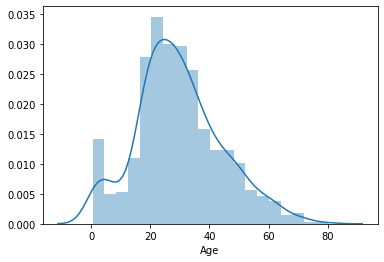

In [72]:
sns.distplot(train["Age"])

Most passengers are 15-35 years old.

FacetGrid is used to draw multiple instances of the same histogram on different subsets.

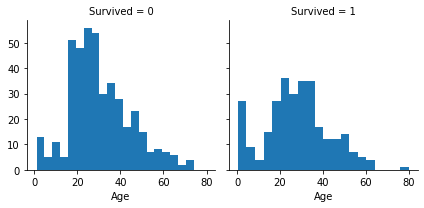

In [73]:
grid = sns.FacetGrid(train, col = "Survived") #different values of "Survived" create different subsets
grid.map(plt.hist, "Age", bins = 20) #plot Age distribution with 20 bins

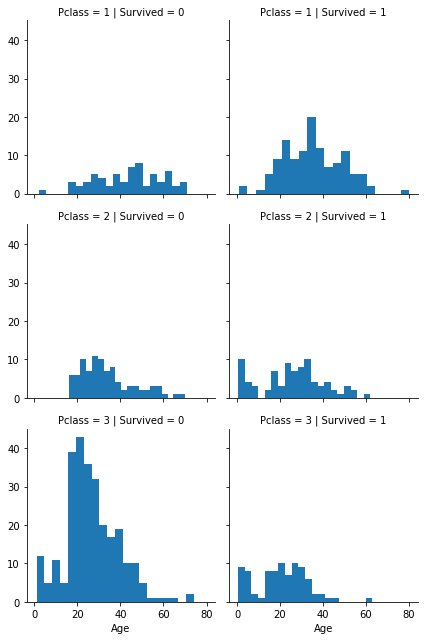

In [74]:
grid = sns.FacetGrid(train, col = "Survived", row = "Pclass")
#combinations of different values of "Survived" and "Pclass" create different subsets
grid.map(plt.hist, "Age", bins = 20)

Observations:
* Small children had high survival chance (equal even in 3rd class).
* The oldest passangers (~80) survived.
* People 15 - 30 had low survival chance (equal in 2nd class and much different in 3rd class).

Decisions:
* Let's use Age feature for prediciting.
* Let's split Age feauture into bins.

/home/dittohead/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


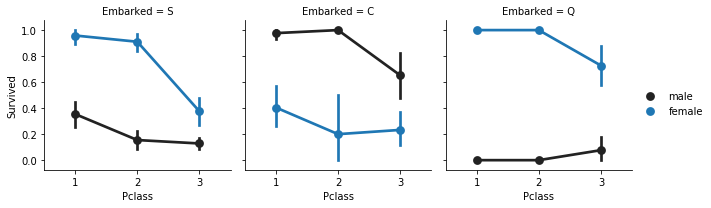

In [75]:
grid = sns.FacetGrid(train, col = "Embarked")
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", order = [1, 2, 3])
grid.add_legend()

/home/dittohead/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


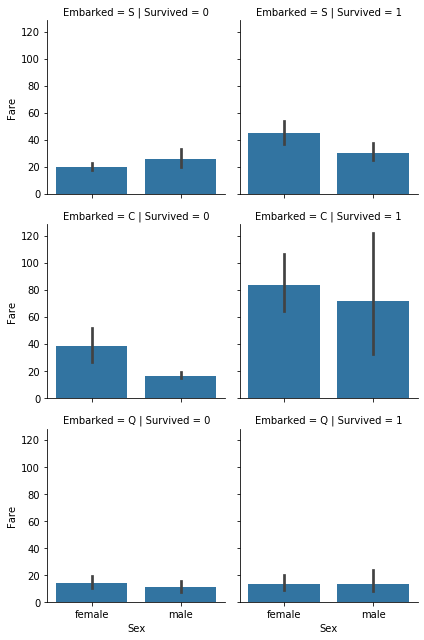

In [76]:
grid = sns.FacetGrid(train, row = "Embarked", col = "Survived")
grid.map(sns.barplot, "Sex", "Fare")

Apparently, most of the rich embarked in C.